In [8]:
from pathlib import Path
from typing import List, Optional
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging

from src.webanno_tsv import webanno_tsv_read_file, Document, Annotation, Token

train_data_dir = Path("./data/train")
test_data_dir = Path("./data/test_labeled")
val_data_dir = Path("./data/val")


In [9]:
def get_annotations(files):
    annotations = []
    for file_path in files:
        doc = webanno_tsv_read_file(file_path)
        annotations.extend([x for x in doc.annotations])

    print(f'{len(annotations)} annotations found in {len(files)} files.')    
   
    counter = defaultdict(int)
    for annotation in annotations:
        counter[annotation.label] += 1

    label_to_uniq_span = defaultdict(set)

    for annotation in annotations:
        label_to_uniq_span[annotation.label].add(annotation.text)

    # for label, uniq_spans in label_to_uniq_span.items():
    #     print(f'{label}:\t{len(uniq_spans)}')
    total_spans = 0
    total_unique_spans = 0
    for label in sorted(counter.keys()):
        print(f'{label}:\t{counter[label]}')
        total_spans += counter[label]
    print('======================')
    for label in sorted(label_to_uniq_span.keys()):
        print(f'{label}:\t{len(label_to_uniq_span[label])}')
        total_unique_spans += len(label_to_uniq_span[label])
    return total_spans, total_unique_spans
    
# print(counter)
# train_df = pd.DataFrame(counter.items(), columns=['label', 'count']).sort_values(by='count', ascending=False)
# print(train_df)




In [10]:
files = [x for x in train_data_dir.rglob("*.tsv")]

total_train_span, total_unqiue_train_span = get_annotations(files)


9125 annotations found in 183 files.
CONFERENCE:	616
DATASET:	1397
EVALMETRIC:	558
LICENSE:	127
ONTOLOGY:	86
PROGLANG:	565
PROJECT:	707
PUBLICATION:	1121
SOFTWARE:	3874
WORKSHOP:	74
CONFERENCE:	374
DATASET:	599
EVALMETRIC:	220
LICENSE:	56
ONTOLOGY:	31
PROGLANG:	65
PROJECT:	133
PUBLICATION:	921
SOFTWARE:	1260
WORKSHOP:	45


In [11]:
files = [x for x in val_data_dir.rglob("*.tsv")]

total_val_span, total_unqiue_val_span = get_annotations(files)
total_val_span, total_unqiue_val_span

1541 annotations found in 33 files.
CONFERENCE:	365
DATASET:	159
EVALMETRIC:	58
LICENSE:	15
ONTOLOGY:	27
PROGLANG:	56
PROJECT:	77
PUBLICATION:	373
SOFTWARE:	404
WORKSHOP:	7
CONFERENCE:	116
DATASET:	56
EVALMETRIC:	35
LICENSE:	7
ONTOLOGY:	6
PROGLANG:	14
PROJECT:	19
PUBLICATION:	354
SOFTWARE:	130
WORKSHOP:	7


(1541, 744)

In [12]:
files = [x for x in test_data_dir.rglob("*.tsv")]

total_test_span, total_unqiue_test_span = get_annotations(files)

1995 annotations found in 40 files.
CONFERENCE:	195
DATASET:	263
EVALMETRIC:	143
LICENSE:	26
ONTOLOGY:	8
PROGLANG:	109
PROJECT:	28
PUBLICATION:	362
SOFTWARE:	824
WORKSHOP:	37
CONFERENCE:	137
DATASET:	122
EVALMETRIC:	72
LICENSE:	14
ONTOLOGY:	1
PROGLANG:	20
PROJECT:	23
PUBLICATION:	318
SOFTWARE:	275
WORKSHOP:	15


In [13]:
total_span = total_train_span + total_val_span + total_test_span
total_unique_span = total_unqiue_train_span + total_unqiue_val_span + total_unqiue_test_span
print(f'Total spans: {total_span}')
print(f'Total unique spans: {total_unique_span}')

Total spans: 12661
Total unique spans: 5445


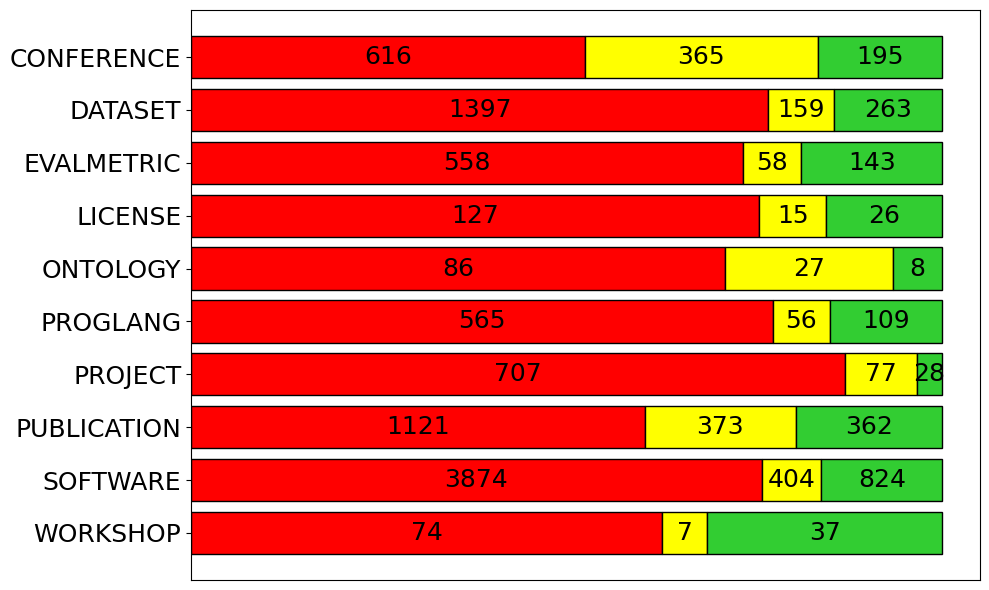

In [14]:
import matplotlib.pyplot as plt

# Data
classes = [
    "CONFERENCE", "DATASET", "EVALMETRIC", "LICENSE", "ONTOLOGY",
    "PROGLANG", "PROJECT", "PUBLICATION", "SOFTWARE", "WORKSHOP"
]

raw_values = [
    [616, 365, 195],
    [1397, 159, 263],
    [558, 58, 143],
    [127, 15, 26],
    [86, 27, 8],
    [565, 56, 109],
    [707, 77, 28],
    [1121, 373, 362],
    [3874, 404, 824],
    [74, 7, 37]
]

# Normalize values row-wise
values = [[v / sum(row) for v in row] for row in raw_values]

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(classes))

# Bar colors
colors = ['red', 'yellow', 'limegreen']

# Draw stacked horizontal bars
for i, (train, val, test) in enumerate(values):
    ax.barh(i, train, color=colors[0], edgecolor='black')
    ax.barh(i, val, left=train, color=colors[1], edgecolor='black')
    ax.barh(i, test, left=train + val, color=colors[2], edgecolor='black')

# Add text labels as percentages
for i, (train, val, test) in enumerate(values):
    ax.text(train / 2, i, f"{raw_values[i][0]}", va='center', ha='center', fontsize=18, color='black')
    ax.text(train + val / 2, i, f"{raw_values[i][1]}", va='center', ha='center', fontsize=18)
    ax.text(train + val + test / 2, i, f"{raw_values[i][2]}", va='center', ha='center', fontsize=18, color='black')

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(classes, fontsize=18)
ax.invert_yaxis()
ax.xaxis.set_visible(False)

# ax.set_xlim(0, 1)
# ax.set_xlabel('Spans', fontsize=18)
# ax.set_title('Text Span Distribution (Train / Val / Test)', fontsize=16)
ax.tick_params(axis='x', labelsize=18)
# Legend
# patches = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
# ax.legend(patches, ['Train', 'Val', 'Test'], loc='lower right', fontsize=14)

plt.tight_layout()
plt.savefig('span_distribution.png', dpi=300)


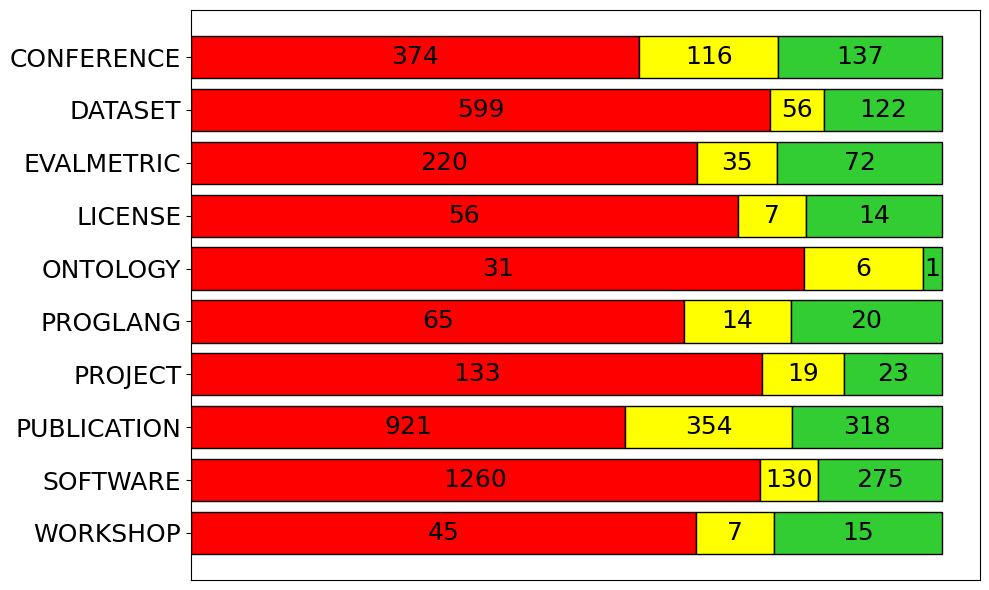

In [15]:
import matplotlib.pyplot as plt

# Data
classes = [
    "CONFERENCE", "DATASET", "EVALMETRIC", "LICENSE", "ONTOLOGY",
    "PROGLANG", "PROJECT", "PUBLICATION", "SOFTWARE", "WORKSHOP"
]
raw_values = [
    [374, 116, 137],  # CONFERENCE
    [599, 56, 122],   # DATASET
    [220, 35, 72],    # EVALMETRIC
    [56, 7, 14],      # LICENSE
    [31, 6, 1],       # ONTOLOGY
    [65, 14, 20],     # PROLANG
    [133, 19, 23],    # PROJECT
    [921, 354, 318],  # PUBLICATION
    [1260, 130, 275], # SOFTWARE
    [45, 7, 15]       # WORKSHOP
]

# Normalize values row-wise
values = [[v / sum(row) for v in row] for row in raw_values]

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(classes))

# Bar colors
colors = ['red', 'yellow', 'limegreen']

# Draw stacked horizontal bars
for i, (train, val, test) in enumerate(values):
    ax.barh(i, train, color=colors[0], edgecolor='black')
    ax.barh(i, val, left=train, color=colors[1], edgecolor='black')
    ax.barh(i, test, left=train + val, color=colors[2], edgecolor='black')

# Add text labels as percentages
for i, (train, val, test) in enumerate(values):
    ax.text(train / 2, i, f"{raw_values[i][0]}", va='center', ha='center', fontsize=18, color='black')
    ax.text(train + val / 2, i, f"{raw_values[i][1]}", va='center', ha='center', fontsize=18)
    ax.text(train + val + test / 2, i, f"{raw_values[i][2]}", va='center', ha='center', fontsize=18, color='black')

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(classes, fontsize=18)
ax.invert_yaxis()
# ax.set_xlim(0, 1)
# ax.set_xlabel('Spans', fontsize=18)
# ax.set_title('Text Span Distribution (Train / Val / Test)', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.xaxis.set_visible(False)

# Legend
# patches = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
# ax.legend(patches, ['Train', 'Val', 'Test'], loc='lower right', fontsize=14)

plt.tight_layout()
plt.savefig('unique_span_distribution.png', dpi=300)


In [16]:
train_files = [x for x in train_data_dir.rglob("*.tsv")]
val_files  = [x for x in val_data_dir.rglob("*.tsv")]
test_files = [x for x in test_data_dir.rglob("*.tsv")]
print(f'{len(train_files)} train files found.')
print(f'{len(val_files)} val files found.')
print(f'{len(test_files)} test files found.')
print(f'total {len(train_files) + len(val_files) + len(test_files)} files found.')

183 train files found.
33 val files found.
40 test files found.
total 256 files found.


# Check Generated content difference

In [17]:
from difflib import SequenceMatcher
import hashlib
from src.cleaner import Cleaner
import re
test_files = sorted([x for x in test_data_dir.rglob("*.tsv")])

LABELS = [
    "CONFERENCE", "DATASET", "EVALMETRIC", "LICENSE", "ONTOLOGY",
    "PROGLANG", "PROJECT", "PUBLICATION", "SOFTWARE", "WORKSHOP"
]
pattern = r'</?(' + '|'.join(LABELS) + r')>'

# Substitute matching tags with empty string

In [ ]:
model_name = 'deepseek-chat'
predicted_data_dir = Path(f'./results/{model_name}/prompt-0')

file_to_ratio = defaultdict(list)
nbr_chars = 0
nbr_chars_pred = 0
for test_path in test_files:
    doc = webanno_tsv_read_file(test_path)    
    for sent in doc.sentences:
        sent_text = sent.text
        sid = hashlib.sha256(sent.text.encode()).hexdigest()[:8]
        pred_path = predicted_data_dir / f'zzz_{test_path.name}' / f'{sid}.txt'
        if not pred_path.exists():
            # print(f'pred_path: {pred_path} does not exist.')
            continue

        with open(pred_path, 'r') as fd:
            predicted_text = fd.read()

        predicted_text = Cleaner(predicted_text).clean()
        predicted_text = re.sub(pattern, '', predicted_text)

        ratio = SequenceMatcher(None, sent_text, predicted_text).ratio()
        file_to_ratio[test_path.name].append(ratio)

        nbr_chars += len(sent_text)
        nbr_chars_pred = len(predicted_text)

total_sentences = sum([len(x) for x in file_to_ratio.values()])
total_sentences_80 = sum([len([y for y in x if y >= 0.80]) for x in file_to_ratio.values()])
total_sentences_85 = sum([len([y for y in x if y >= 0.85]) for x in file_to_ratio.values()])

total_sentences_90 = sum([len([y for y in x if y >= 0.90]) for x in file_to_ratio.values()])
total_sentences_95 = sum([len([y for y in x if y >= 0.95]) for x in file_to_ratio.values()])
total_sentences_99 = sum([len([y for y in x if y >= 0.99]) for x in file_to_ratio.values()])
total_sentences_100 = sum([len([y for y in x if y >= 1.00]) for x in file_to_ratio.values()])

print(f'Total sentences: {total_sentences}')
print(f'Total sentences with ratio >= 0.80: {total_sentences_80}')
print(f'Total sentences with ratio >= 0.85: {total_sentences_85}')
print(f'Total sentences with ratio >= 0.90: {total_sentences_90}')
print(f'Total sentences with ratio >= 0.95: {total_sentences_95}')
print(f'Total sentences with ratio >= 0.99: {total_sentences_99}')
print(f'Total sentences with ratio >= 1.00: {total_sentences_100}')
deepseek_chat = {
    'total_sentences': total_sentences,
    'total_sentences_80': total_sentences_80,
    'total_sentences_85': total_sentences_85,
    'total_sentences_90': total_sentences_90,
    'total_sentences_95': total_sentences_95,
    'total_sentences_99': total_sentences_99,
    'total_sentences_100': total_sentences_100,
}
print(f'Number of characters in original text: {nbr_chars}')
print(f'Number of characters in predicted text: {nbr_chars_pred}')
print(f'Number of characters in total text: {nbr_chars+nbr_chars_pred}')

Total sentences: 1277
Total sentences with ratio >= 0.80: 1150
Total sentences with ratio >= 0.85: 1140
Total sentences with ratio >= 0.90: 1124
Total sentences with ratio >= 0.95: 1074
Total sentences with ratio >= 0.99: 826
Total sentences with ratio >= 1.00: 357


In [19]:
model_name = 'gpt-4o-mini'
predicted_data_dir = Path(f'./results/{model_name}/prompt-0')

file_to_ratio = defaultdict(list)
for test_path in test_files:
    doc = webanno_tsv_read_file(test_path)    
    for sent in doc.sentences:
        sent_text = sent.text
        sid = hashlib.sha256(sent.text.encode()).hexdigest()[:8]
        pred_path = predicted_data_dir / f'zzz_{test_path.name}' / f'{sid}.txt'
        if not pred_path.exists():
            # print(f'pred_path: {pred_path} does not exist.')
            continue

        with open(pred_path, 'r') as fd:
            predicted_text = fd.read()

        predicted_text = Cleaner(predicted_text).clean()
        predicted_text = re.sub(pattern, '', predicted_text)

        ratio = SequenceMatcher(None, sent_text, predicted_text).ratio()
        file_to_ratio[test_path.name].append(ratio)
  

total_sentences = sum([len(x) for x in file_to_ratio.values()])
total_sentences_80 = sum([len([y for y in x if y >= 0.80]) for x in file_to_ratio.values()])
total_sentences_85 = sum([len([y for y in x if y >= 0.85]) for x in file_to_ratio.values()])

total_sentences_90 = sum([len([y for y in x if y >= 0.90]) for x in file_to_ratio.values()])
total_sentences_95 = sum([len([y for y in x if y >= 0.95]) for x in file_to_ratio.values()])
total_sentences_99 = sum([len([y for y in x if y >= 0.99]) for x in file_to_ratio.values()])
total_sentences_100 = sum([len([y for y in x if y >= 1.00]) for x in file_to_ratio.values()])

print(f'Total sentences: {total_sentences}')
print(f'Total sentences with ratio >= 0.80: {total_sentences_80}')
print(f'Total sentences with ratio >= 0.85: {total_sentences_85}')
print(f'Total sentences with ratio >= 0.90: {total_sentences_90}')
print(f'Total sentences with ratio >= 0.95: {total_sentences_95}')
print(f'Total sentences with ratio >= 0.99: {total_sentences_99}')
print(f'Total sentences with ratio >= 1.00: {total_sentences_100}')
gpt_4o_mini = {
    'total_sentences': total_sentences,
    'total_sentences_80': total_sentences_80,
    'total_sentences_85': total_sentences_85,
    'total_sentences_90': total_sentences_90,
    'total_sentences_95': total_sentences_95,
    'total_sentences_99': total_sentences_99,
    'total_sentences_100': total_sentences_100,
}

Total sentences: 1277
Total sentences with ratio >= 0.80: 1136
Total sentences with ratio >= 0.85: 1120
Total sentences with ratio >= 0.90: 1089
Total sentences with ratio >= 0.95: 1035
Total sentences with ratio >= 0.99: 768
Total sentences with ratio >= 1.00: 521


In [20]:
model_name = 'gemini-2.0-flash'
predicted_data_dir = Path(f'./results/{model_name}/prompt-0')

file_to_ratio = defaultdict(list)
for test_path in test_files:
    doc = webanno_tsv_read_file(test_path)    
    for sent in doc.sentences:
        sent_text = sent.text
        sid = hashlib.sha256(sent.text.encode()).hexdigest()[:8]
        pred_path = predicted_data_dir / f'zzz_{test_path.name}' / f'{sid}.txt'
        if not pred_path.exists():
            # print(f'pred_path: {pred_path} does not exist.')
            continue

        with open(pred_path, 'r') as fd:
            predicted_text = fd.read()

        predicted_text = Cleaner(predicted_text).clean()
        predicted_text = re.sub(pattern, '', predicted_text)

        ratio = SequenceMatcher(None, sent_text, predicted_text).ratio()
        file_to_ratio[test_path.name].append(ratio)
  

total_sentences = sum([len(x) for x in file_to_ratio.values()])
total_sentences_80 = sum([len([y for y in x if y >= 0.80]) for x in file_to_ratio.values()])
total_sentences_85 = sum([len([y for y in x if y >= 0.85]) for x in file_to_ratio.values()])

total_sentences_90 = sum([len([y for y in x if y >= 0.90]) for x in file_to_ratio.values()])
total_sentences_95 = sum([len([y for y in x if y >= 0.95]) for x in file_to_ratio.values()])
total_sentences_99 = sum([len([y for y in x if y >= 0.99]) for x in file_to_ratio.values()])
total_sentences_100 = sum([len([y for y in x if y >= 1.00]) for x in file_to_ratio.values()])

print(f'Total sentences: {total_sentences}')
print(f'Total sentences with ratio >= 0.80: {total_sentences_80}')
print(f'Total sentences with ratio >= 0.85: {total_sentences_85}')
print(f'Total sentences with ratio >= 0.90: {total_sentences_90}')
print(f'Total sentences with ratio >= 0.95: {total_sentences_95}')
print(f'Total sentences with ratio >= 0.99: {total_sentences_99}')
print(f'Total sentences with ratio >= 1.00: {total_sentences_100}')
gemini_flash = {
    'total_sentences': total_sentences,
    'total_sentences_80': total_sentences_80,
    'total_sentences_85': total_sentences_85,
    'total_sentences_90': total_sentences_90,
    'total_sentences_95': total_sentences_95,
    'total_sentences_99': total_sentences_99,
    'total_sentences_100': total_sentences_100,
}

Total sentences: 1277
Total sentences with ratio >= 0.80: 1239
Total sentences with ratio >= 0.85: 1236
Total sentences with ratio >= 0.90: 1226
Total sentences with ratio >= 0.95: 1195
Total sentences with ratio >= 0.99: 995
Total sentences with ratio >= 1.00: 765


In [21]:
model_name = 'Llama-3.1-8B-Instruct'
predicted_data_dir = Path(f'./results/{model_name}/prompt-0')

file_to_ratio = defaultdict(list)
for test_path in test_files:
    doc = webanno_tsv_read_file(test_path)    
    for sent in doc.sentences:
        sent_text = sent.text
        sid = hashlib.sha256(sent.text.encode()).hexdigest()[:8]
        pred_path = predicted_data_dir / f'zzz_{test_path.name}' / f'{sid}.txt'
        if not pred_path.exists():
            # print(f'pred_path: {pred_path} does not exist.')
            continue

        with open(pred_path, 'r') as fd:
            predicted_text = fd.read()

        predicted_text = Cleaner(predicted_text).clean()
        predicted_text = re.sub(pattern, '', predicted_text)

        ratio = SequenceMatcher(None, sent_text, predicted_text).ratio()
        file_to_ratio[test_path.name].append(ratio)
  

total_sentences = sum([len(x) for x in file_to_ratio.values()])
total_sentences_80 = sum([len([y for y in x if y >= 0.80]) for x in file_to_ratio.values()])
total_sentences_85 = sum([len([y for y in x if y >= 0.85]) for x in file_to_ratio.values()])

total_sentences_90 = sum([len([y for y in x if y >= 0.90]) for x in file_to_ratio.values()])
total_sentences_95 = sum([len([y for y in x if y >= 0.95]) for x in file_to_ratio.values()])
total_sentences_99 = sum([len([y for y in x if y >= 0.99]) for x in file_to_ratio.values()])
total_sentences_100 = sum([len([y for y in x if y >= 1.00]) for x in file_to_ratio.values()])

print(f'Total sentences: {total_sentences}')
print(f'Total sentences with ratio >= 0.80: {total_sentences_80}')
print(f'Total sentences with ratio >= 0.85: {total_sentences_85}')
print(f'Total sentences with ratio >= 0.90: {total_sentences_90}')
print(f'Total sentences with ratio >= 0.95: {total_sentences_95}')
print(f'Total sentences with ratio >= 0.99: {total_sentences_99}')
print(f'Total sentences with ratio >= 1.00: {total_sentences_100}')
llama_3 = {
    'total_sentences': total_sentences,
    'total_sentences_80': total_sentences_80,
    'total_sentences_85': total_sentences_85,
    'total_sentences_90': total_sentences_90,
    'total_sentences_95': total_sentences_95,
    'total_sentences_99': total_sentences_99,
    'total_sentences_100': total_sentences_100,
}

Total sentences: 1277
Total sentences with ratio >= 0.80: 850
Total sentences with ratio >= 0.85: 802
Total sentences with ratio >= 0.90: 748
Total sentences with ratio >= 0.95: 654
Total sentences with ratio >= 0.99: 459
Total sentences with ratio >= 1.00: 345


In [22]:
model_name = 'Mistral-7B-Instruct-v0.3'
predicted_data_dir = Path(f'./results/{model_name}/prompt-0')

file_to_ratio = defaultdict(list)
for test_path in test_files:
    doc = webanno_tsv_read_file(test_path)    
    for sent in doc.sentences:
        sent_text = sent.text
        sid = hashlib.sha256(sent.text.encode()).hexdigest()[:8]
        pred_path = predicted_data_dir / f'zzz_{test_path.name}' / f'{sid}.txt'
        if not pred_path.exists():
            # print(f'pred_path: {pred_path} does not exist.')
            continue

        with open(pred_path, 'r') as fd:
            predicted_text = fd.read()

        predicted_text = Cleaner(predicted_text).clean()
        predicted_text = re.sub(pattern, '', predicted_text)

        ratio = SequenceMatcher(None, sent_text, predicted_text).ratio()
        file_to_ratio[test_path.name].append(ratio)
  

total_sentences = sum([len(x) for x in file_to_ratio.values()])
total_sentences_80 = sum([len([y for y in x if y >= 0.80]) for x in file_to_ratio.values()])
total_sentences_85 = sum([len([y for y in x if y >= 0.85]) for x in file_to_ratio.values()])

total_sentences_90 = sum([len([y for y in x if y >= 0.90]) for x in file_to_ratio.values()])
total_sentences_95 = sum([len([y for y in x if y >= 0.95]) for x in file_to_ratio.values()])
total_sentences_99 = sum([len([y for y in x if y >= 0.99]) for x in file_to_ratio.values()])
total_sentences_100 = sum([len([y for y in x if y >= 1.00]) for x in file_to_ratio.values()])

print(f'Total sentences: {total_sentences}')
print(f'Total sentences with ratio >= 0.80: {total_sentences_80}')
print(f'Total sentences with ratio >= 0.85: {total_sentences_85}')
print(f'Total sentences with ratio >= 0.90: {total_sentences_90}')
print(f'Total sentences with ratio >= 0.95: {total_sentences_95}')
print(f'Total sentences with ratio >= 0.99: {total_sentences_99}')
print(f'Total sentences with ratio >= 1.00: {total_sentences_100}')
mistral_7 = {
    'total_sentences': total_sentences,
    'total_sentences_80': total_sentences_80,
    'total_sentences_85': total_sentences_85,
    'total_sentences_90': total_sentences_90,
    'total_sentences_95': total_sentences_95,
    'total_sentences_99': total_sentences_99,
    'total_sentences_100': total_sentences_100,
}

Total sentences: 1277
Total sentences with ratio >= 0.80: 680
Total sentences with ratio >= 0.85: 596
Total sentences with ratio >= 0.90: 502
Total sentences with ratio >= 0.95: 353
Total sentences with ratio >= 0.99: 97
Total sentences with ratio >= 1.00: 19


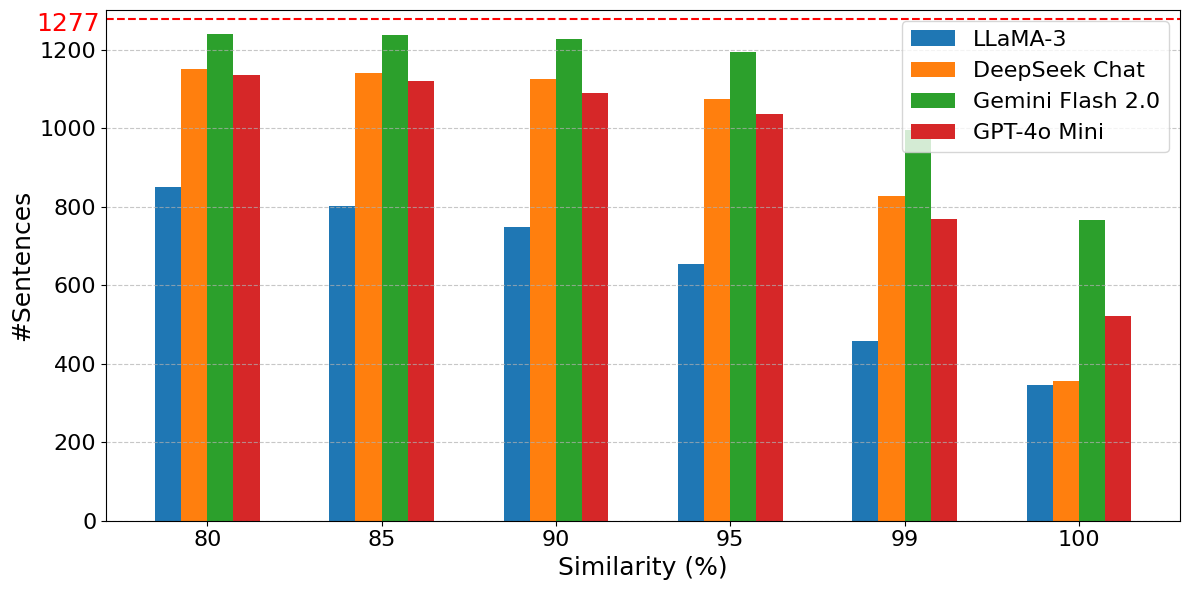

In [23]:
models = {
#    'Mistral-7': mistral_7,
    'LLaMA-3': llama_3,
    'DeepSeek Chat': deepseek_chat,
    'Gemini Flash 2.0': gemini_flash,
    'GPT-4o Mini': gpt_4o_mini,
}

thresholds = ['80', '85', '90', '95', '99', '100']
x = np.arange(len(thresholds))  # label locations

bar_width = 0.15
offsets = np.linspace(-bar_width*1.5, bar_width*1.5, len(models))  # position each model's bars

plt.figure(figsize=(12, 6))

for i, (model_name, data) in enumerate(models.items()):
    values = [data[f'total_sentences_{t}'] for t in thresholds]
    plt.bar(x + offsets[i], values, width=bar_width, label=model_name)

# Labels and formatting
plt.xlabel('Similarity (%)', fontsize=18)
# plt.ylabel('#Sentences (%)', fontsize=18)
plt.ylabel('#Sentences', fontsize=18)

# plt.title('#Sentence')
plt.xticks(x, thresholds, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=1277, color='red', linestyle='--', linewidth=1.5, label='Total Sentences = 1277')
plt.text(x=-0.98, y=1277 - 30, s='1277', color='red', fontsize=18)

plt.tight_layout()

# plt.show()
plt.savefig("sent-ratio.png", dpi=300)

In [24]:
_llama_3 = {k: v / llama_3['total_sentences'] * 100 for k, v in llama_3.items()}
_deepseek_chat = {k: v / deepseek_chat['total_sentences'] * 100 for k, v in deepseek_chat.items()}
_gemini_flash = {k: v / gemini_flash['total_sentences'] * 100 for k, v in gemini_flash.items()}
_gpt_4o_mini = {k: v / gpt_4o_mini['total_sentences'] * 100 for k, v in gpt_4o_mini.items()}   
print(f'LLAMA-3: {_llama_3}')
print(f'DeepSeek Chat: {_deepseek_chat}')
print(f'Gemini Flash: {_gemini_flash}')
print(f'GPT-4o Mini: {_gpt_4o_mini}')
# print(f'Mistral-7: {_mistral_7}')
# print(f'LLAMA-3: {_llama_3}')
# print(f'DeepSeek Chat: {_deepseek_chat}')
# print(f'Gemini Flash: {_gemini_flash}')             

LLAMA-3: {'total_sentences': 100.0, 'total_sentences_80': 66.56225528582615, 'total_sentences_85': 62.80344557556774, 'total_sentences_90': 58.57478465152701, 'total_sentences_95': 51.21378230227095, 'total_sentences_99': 35.94361785434612, 'total_sentences_100': 27.016444792482382}
DeepSeek Chat: {'total_sentences': 100.0, 'total_sentences_80': 90.05481597494128, 'total_sentences_85': 89.27173061863743, 'total_sentences_90': 88.0187940485513, 'total_sentences_95': 84.1033672670321, 'total_sentences_99': 64.68285043069694, 'total_sentences_100': 27.956147220046983}
Gemini Flash: {'total_sentences': 100.0, 'total_sentences_80': 97.02427564604542, 'total_sentences_85': 96.78935003915427, 'total_sentences_90': 96.00626468285043, 'total_sentences_95': 93.57870007830854, 'total_sentences_99': 77.9169929522318, 'total_sentences_100': 59.90602975724354}
GPT-4o Mini: {'total_sentences': 100.0, 'total_sentences_80': 88.9584964761159, 'total_sentences_85': 87.70555990602976, 'total_sentences_90'

In [ ]:
# Extract the F1 scores for Partial and Exact from the table
# Format: {class: {model: {"partial": f1_score, "exact": f1_score}}}

f1_scores = {
    "CONFERENCE": {
        "Mistral-7B-Instruct-v0.3": {"partial": 29.08, "exact": 17.59},
        "Llama3-1.8B": {"partial": 62.61, "exact": 33.10},
        "Deepseek-Chat": {"partial": 60.62, "exact": 36.68},
        "Gemini-Flash-2.0": {"partial": 77.38, "exact": 47.63},
        "GPT-4o-mini": {"partial": 75.48, "exact": 42.44}
    },
    "DATASET": {
        "Mistral-7B-Instruct-v0.3": {"partial": 30.85, "exact": 21.51},
        "Llama3-1.8B": {"partial": 40.07, "exact": 30.85},
        "Deepseek-Chat": {"partial": 50.98, "exact": 45.30},
        "Gemini-Flash-2.0": {"partial": 41.70, "exact": 38.03},
        "GPT-4o-mini": {"partial": 43.86, "exact": 37.11}
    },
    "EVALMETRIC": {
        "Mistral-7B-Instruct-v0.3": {"partial": 6.49, "exact": 6.49},
        "Llama3-1.8B": {"partial": 34.29, "exact": 33.37},
        "Deepseek-Chat": {"partial": 37.07, "exact": 33.94},
        "Gemini-Flash-2.0": {"partial": 28.28, "exact": 26.97},
        "GPT-4o-mini": {"partial": 19.76, "exact": 19.76}
    },
    "LICENSE": {
        "Mistral-7B-Instruct-v0.3": {"partial": 69.50, "exact": 66.97},
        "Llama3-1.8B": {"partial": 77.33, "exact": 72.40},
        "Deepseek-Chat": {"partial": 79.68, "exact": 77.73},
        "Gemini-Flash-2.0": {"partial": 75.61, "exact": 71.12},
        "GPT-4o-mini": {"partial": 87.34, "exact": 86.15}
    },
    "ONTOLOGY": {
        "Mistral-7B-Instruct-v0.3": {"partial": 45.98, "exact": 13.89},
        "Llama3-1.8B": {"partial": 33.90, "exact": 18.52},
        "Deepseek-Chat": {"partial": 33.90, "exact": 18.52},
        "Gemini-Flash-2.0": {"partial": 45.98, "exact": 13.89},
        "GPT-4o-mini": {"partial": 23.14, "exact": 0.00}
    },
    "PROGLANG": {
        "Mistral-7B-Instruct-v0.3": {"partial": 10.13, "exact": 6.70},
        "Llama3-1.8B": {"partial": 9.93, "exact": 8.34},
        "Deepseek-Chat": {"partial": 29.97, "exact": 27.37},
        "Gemini-Flash-2.0": {"partial": 34.41, "exact": 31.69},
        "GPT-4o-mini": {"partial": 18.82, "exact": 13.75}
    },
    "PROJECT": {
        "Mistral-7B-Instruct-v0.3": {"partial": 33.27, "exact": 4.66},
        "Llama3-1.8B": {"partial": 49.62, "exact": 49.62},
        "Deepseek-Chat": {"partial": 38.10, "exact": 38.10},
        "Gemini-Flash-2.0": {"partial": 53.72, "exact": 53.72},
        "GPT-4o-mini": {"partial": 56.23, "exact": 48.21}
    },
    "PUBLICATION": {
        "Mistral-7B-Instruct-v0.3": {"partial": 37.39, "exact": 32.05},
        "Llama3-1.8B": {"partial": 55.84, "exact": 22.41},
        "Deepseek-Chat": {"partial": 70.42, "exact": 64.95},
        "Gemini-Flash-2.0": {"partial": 61.07, "exact": 58.99},
        "GPT-4o-mini": {"partial": 63.51, "exact": 54.14}
    },
    "SOFTWARE": {
        "Mistral-7B-Instruct-v0.3": {"partial": 10.99, "exact": 6.46},
        "Llama3-1.8B": {"partial": 26.96, "exact": 22.41},
        "Deepseek-Chat": {"partial": 28.50, "exact": 23.12},
        "Gemini-Flash-2.0": {"partial": 15.18, "exact": 13.48},
        "GPT-4o-mini": {"partial": 63.51, "exact": 18.68}
    },
    "WORKSHOP": {
        "Mistral-7B-Instruct-v0.3": {"partial": 20.48, "exact": 20.48},
        "Llama3-1.8B": {"partial": 0.00, "exact": 0.00},
        "Deepseek-Chat": {"partial": 5.29, "exact": 5.89},
        "Gemini-Flash-2.0": {"partial": 12.99, "exact": 5.41},
        "GPT-4o-mini": {"partial": 20.68, "exact": 20.68}
    }
}

f1_scores


{'CONFERENCE': {'Mistral-7B-Instruct-v0.3': {'partial': 29.08, 'exact': 17.59},
  'Llama3-1.8B': {'partial': 62.61, 'exact': 33.1},
  'Deepseek-Chat': {'partial': 60.62, 'exact': 36.68},
  'Gemini-Flash-2.0': {'partial': 77.38, 'exact': 47.63},
  'GPT-4o-mini': {'partial': 75.48, 'exact': 42.44}},
 'DATASET': {'Mistral-7B-Instruct-v0.3': {'partial': 30.85, 'exact': 21.51},
  'Llama3-1.8B': {'partial': 40.07, 'exact': 30.85},
  'Deepseek-Chat': {'partial': 50.98, 'exact': 45.3},
  'Gemini-Flash-2.0': {'partial': 41.7, 'exact': 38.03},
  'GPT-4o-mini': {'partial': 43.86, 'exact': 37.11}},
 'EVALMETRIC': {'Mistral-7B-Instruct-v0.3': {'partial': 6.49, 'exact': 6.49},
  'Llama3-1.8B': {'partial': 34.29, 'exact': 33.37},
  'Deepseek-Chat': {'partial': 37.07, 'exact': 33.94},
  'Gemini-Flash-2.0': {'partial': 28.28, 'exact': 26.97},
  'GPT-4o-mini': {'partial': 19.76, 'exact': 19.76}},
 'LICENSE': {'Mistral-7B-Instruct-v0.3': {'partial': 69.5, 'exact': 66.97},
  'Llama3-1.8B': {'partial': 77.

In [ ]:
# LABELS = [x for x in f1_scores.keys()]

# x = np.arange(len(LABELS))  # label locations
# models = [x for x in f1_scores[LABELS[0]].keys()]
# models
# bar_width = 0.15
# offsets = np.linspace(-bar_width*1.5, bar_width*1.5, len(models))  # position each model's bars

# plt.figure(figsize=(12, 6))

# for i, (model_name, data) in enumerate(models.items()):
#     values = [data[f'total_sentences_{t}'] for t in thresholds]
#     plt.bar(x + offsets[i], values, width=bar_width, label=model_name)

# # # Labels and formatting
# # plt.xlabel('Similarity (%)', fontsize=18)
# # # plt.ylabel('#Sentences (%)', fontsize=18)
# # plt.ylabel('#Sentences', fontsize=18)

# # # plt.title('#Sentence')
# # plt.xticks(x, thresholds, fontsize=16)
# # plt.yticks(fontsize=16)
# # plt.legend(fontsize=16)
# # plt.grid(axis='y', linestyle='--', alpha=0.7)
# # plt.axhline(y=1277, color='red', linestyle='--', linewidth=1.5, label='Total Sentences = 1277')
# # plt.text(x=-0.98, y=1277 - 30, s='1277', color='red', fontsize=18)

# # plt.tight_layout()

# # # plt.show()
# # plt.savefig("sent-ratio.png", dpi=300)


# Transform to flat DataFrame
records_partial = []
records_exact = []

for entity, models in f1_scores.items():
    for model, scores in models.items():
        records_partial.append({"Entity Class": entity, "Model": model, "F1 Type": "Partial", "F1 Score": scores["partial"]})
        records_exact.append({"Entity Class": entity, "Model": model, "F1 Type": "Exact", "F1 Score": scores["exact"]})



